In [2]:
#  Load results
import os
import pandas as pd

results_list = []
for idx in range(1, 10):
    results = pd.read_csv("./form/assist/assist" + str(idx).zfill(3) + ".csv", encoding="shift-jis")
    results_list.append(results)

FileNotFoundError: [Errno 2] No such file or directory: './form/assist/assist010.csv'

In [11]:
# Create stats
class Stats():
    def __init__(self):
        self.ease = []
        self.predictable = []
        self.condition = ""
        self.dialogue = ""
        self.rater = []
        return

stats_list = []
for idx_results, results in enumerate(results_list):
    for idx_question in range(0, 10):
        stats = Stats()

        data_ease = results.iloc[:, [4 + idx_question * 3]]
        data_ease = data_ease.set_axis(["ease"], axis=1)
        stats.ease = data_ease["ease"].values.tolist()

        data_predictable = results.iloc[:, [5 + idx_question * 3]]
        data_predictable = data_predictable.set_axis(["predictable"], axis=1)
        stats.predictable = data_predictable["predictable"].values.tolist()

        if idx_results % 2 == 0:
            stats.condition = "baseline"
        else:
            stats.condition = "assistant"
            
        #stats.dialogue = "dialogue" + str(idx_results // 2 * 10 + idx_question)
        if idx_question < 5:
            stats.dialogue = "A"
        else:
            stats.dialogue = "B"
            
        stats.rater = list(range(idx_results * 10, idx_results * 10 + 10))

        stats_list.append(stats)

In [3]:
# Show summary
import statistics
import numpy as np

ease_base = []
predictable_base = []
ease_assist = []
predictable_assist = []

for stats in stats_list:
    if stats.condition == "baseline":
        ease_base.append(statistics.mean(stats.ease))
        predictable_base.append(statistics.mean(stats.predictable))
    else:
        ease_assist.append(statistics.mean(stats.ease))
        predictable_assist.append(statistics.mean(stats.predictable))

print("------")
print("ease")
print("baseline: ", 
      "mean: ", statistics.mean(ease_base),
      "std: ", statistics.stdev(ease_base))
print("assistant: ",  
      "mean: ", statistics.mean(ease_assist),
      "std: ", statistics.stdev(ease_assist))
print("------")
print("predictable")
print("baseline: ", 
      "mean: ", statistics.mean(predictable_base),
      "std: ", statistics.stdev(predictable_base))
print("assistant: ",
      "mean: ", statistics.mean(predictable_assist),
      "std: ", statistics.stdev(predictable_assist))


------
ease
baseline:  mean:  3.668 std:  1.093289363642152
assistant:  mean:  5.19 std:  1.1817057888614118
------
predictable
baseline:  mean:  3.382 std:  1.5224429884436474
assistant:  mean:  4.6 std:  1.3770717231183875


In [19]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

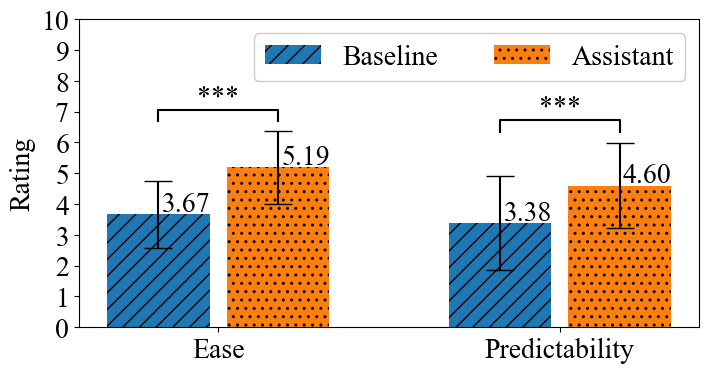

In [23]:
# Show bar graphs
import matplotlib.pyplot as plt
import statistics
import numpy as np

fig, ax = plt.subplots(figsize=(8, 4))
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 20                 # 文字の大きさ
labels = ("Ease", "Predictability")
rate_means = {
    "Baseline": ((
        statistics.mean(ease_base),
        statistics.mean(predictable_base)
    ),
    (
        statistics.stdev(ease_base),
        statistics.stdev(predictable_base)
    )),
    "Assistant": ((
        statistics.mean(ease_assist),
        statistics.mean(predictable_assist)
    ),
    (
        statistics.stdev(ease_assist),
        statistics.stdev(predictable_assist)
    ))
}
rate_stds = {
    "SCAIN": (
        statistics.stdev(ease_base),
        statistics.stdev(predictable_base)
    ),
    "Non-SCAIN": (
        statistics.stdev(ease_assist),
        statistics.stdev(predictable_assist)
    )
}
x = np.arange(len(labels))
width = 0.3
margin = 0.05
multiplier = 0
yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ylim = (0, 10)

xcoord = []
ycoord = []
for attribute, measurement in rate_means.items():
    offset = (width + margin) * multiplier
    rects = ax.bar(x + offset, measurement[0], width, yerr=measurement[1], capsize=10, label=attribute)
    #ax.bar_label(rects, fmt="%0.2f")
    for i in range(len(x)):
        plt.text(x[i] + offset + 0.01, measurement[0][i] + 0.1, "{:1.2f}".format(measurement[0][i]))
        xcoord.append(x[i] + offset)
        ycoord.append(measurement[0][i] + measurement[1][i])
    multiplier += 1

bars = ax.patches
patterns = ['//', '..']  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)

#xcoord = [i + d for i in range(len(x)) for d in [-(width + margin) / 2, (width + margin) / 2]]
barplot_annotate_brackets(0, 2, "***", xcoord, ycoord)
barplot_annotate_brackets(1, 3, "***", xcoord, ycoord)

ax.set_ylabel("Rating")
ax.set_xticks(x + (width + margin) / 2, labels)
ax.set_yticks(yticks)
ax.set_ylim(ylim)
ax.legend(loc='upper right', ncols=2, framealpha=1)


In [12]:
# Two-way ANOVA
import pandas as pd

# Prepare DataFrame
ease_data = pd.DataFrame(
    columns=["rating", "condition", "dialogue", "rater"]
)
predictable_data = pd.DataFrame(
    columns=["rating", "condition", "dialogue", "rater"]
)

for stats in stats_list:
    for ease, rater in zip(stats.ease, stats.rater):
        ease_new = pd.DataFrame({
            "rating": [ease],
            "condition": stats.condition,
            "dialogue": stats.dialogue,
            "rater": rater
        })
        ease_data = pd.concat([ease_data, ease_new])

    for predictable, rater in zip(stats.predictable, stats.rater):
        predictable_new = pd.DataFrame({
            "rating": [predictable],
            "condition": stats.condition,
            "dialogue": stats.dialogue,
            "rater": rater
        })
        predictable_data = pd.concat([predictable_data, predictable_new])

ease_data = ease_data.astype({
    "rating": int,
    "condition": str,
    "dialogue": str,
    "rater": int
})
predictable_data = predictable_data.astype({
    "rating": int,
    "condition": str,
    "dialogue": str,
    "rater": int
})

In [13]:
print(ease_data)

    rating  condition dialogue  rater
0        6   baseline        A      0
0        2   baseline        A      1
0        3   baseline        A      2
0        2   baseline        A      3
0        3   baseline        A      4
..     ...        ...      ...    ...
0        6  assistant        B     95
0        3  assistant        B     96
0        0  assistant        B     97
0        6  assistant        B     98
0        2  assistant        B     99

[1000 rows x 4 columns]


In [15]:
# Run ANOVA
import pingouin as pg

anovaEA = pg.anova(
    data=ease_data, 
    dv="rating",
    between="condition"
)
anovaEA.round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,condition,1,998,84.598,0.0,0.078


In [17]:
anovaPR = pg.anova(
    data=predictable_data, 
    dv="rating", 
    between='condition'
)
anovaPR.round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,condition,1,998,42.88,0.0,0.041
